<a href="https://colab.research.google.com/github/KareemMohamedFathy/CA-project/blob/main/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Kareem Mohamed Fathy

ID:43-6912

Tutorial:MET

---

Name:Mohamed Dewidar

ID:43-18477

Tutorial:MET

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0mi,black,gray,"kia motors america, inc",$15100,$15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13900,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0mi,white,beige,aaero sweet company,$10950,$14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0mi,gray,black,wells fargo dealer services,$26600,$20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0mi,blue,gray,"kia motors america, inc",$12900,$13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [86]:
df.describe

<bound method NDFrame.describe of        year      make  ... sellingprice                                 saledate
0      2013   Hyundai  ...       $10900  Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1      2014    Toyota  ...       $29900  Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2      2012     Lexus  ...       $24200  Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3      2002       BMW  ...        $3200  Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4      2014      Ford  ...       $22100  Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...     ...       ...  ...          ...                                      ...
46573  2013      Ford  ...       $17000  Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574  2012  Infiniti  ...       $21500  Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575  2013       BMW  ...       $22000  Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576  2013    Toyota  ...       $13800  Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577  2013       Kia  ...        $9300  Thu Dec 18 2014 10:00:00 GMT-0800 

In [87]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [88]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,1vwbp7a36dc103091,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.isnull().sum(axis = 0)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [90]:
for column in df:
    print(df[column].value_counts()) 

2013    8682
2012    8448
2014    6887
2011    4072
2008    2646
2007    2466
2010    2254
2006    2168
2009    1826
2005    1641
2004    1323
2003    1058
2015     816
2002     761
2001     553
2000     350
1999     230
1998     158
1997      92
1996      61
1995      44
1994      16
1993       8
1992       8
1991       6
1990       4
Name: year, dtype: int64
Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281

In [91]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [92]:
corr = df.corr()
corr

,year,condition
year,1.000000,0.549158
condition,0.549158,1.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [93]:
#Removing empty variables and then when converting them to null they get distributed based on frequency  of other colors
df['color']=df['color'].replace("—", None)
df['interior']=df['interior'].replace("—", None)
df['interior'].value_counts().sum()


46578

In [94]:
#Removing $ and mi
df['mmr']=df['mmr'].str.replace('$', '',regex=True)
df['sellingprice']=df['sellingprice'].str.replace('$', '',regex=True)
df[['mmr','sellingprice']]

,mmr,sellingprice
0,11000,10900
1,28700,29900
2,22200,24200
3,3675,3200
4,22500,22100
...,...,...
46573,15650,17000
46574,19350,21500
46575,22200,22000
46576,13400,13800


In [95]:
df['odometer']=df['odometer'].str.replace('mi', '',regex=True)
df['odometer']

0         50404.0
1         17846.0
2         21122.0
3        145303.0
4          6714.0
           ...   
46573     52844.0
46574     23185.0
46575     45357.0
46576     43376.0
46577     49953.0
Name: odometer, Length: 46578, dtype: object

In [96]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,19,16,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,1vwbp7a36dc103091,fl,NaN,1.0,black,black,"ford motor credit company,llc",11300,12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9642,21173,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#changing the dateformat
df['saledate']=pd.to_datetime(df['saledate'])
df['saledate']

0        2015-06-02 02:30:00+07:00
1        2015-02-18 07:15:00+08:00
2        2015-01-20 01:30:00+08:00
3        2015-03-04 07:10:00+08:00
4        2015-02-18 06:45:00+08:00
                   ...            
46573    2015-01-07 09:30:00+08:00
46574    2015-06-18 05:30:00+07:00
46575    2015-02-18 02:00:00+08:00
46576    2015-01-14 04:30:00+08:00
46577    2014-12-18 10:00:00+08:00
Name: saledate, Length: 46578, dtype: object

In [98]:
#drop the id because it is usless and drop mmr because it can predict the final price easily
df=df.drop(['vin'], axis=1)
df=df.drop(['mmr'], axis=1)


In [99]:
#convert the attributes from string to int or flat
#df['mmr']=df['mmr'].astype(str).astype(float)
df['sellingprice']=df['sellingprice'].astype(str).astype(int)
df['odometer'] =  df['odometer'].astype(str).astype(float)

In [100]:
#clean the spaces and make everything lowercase so we can eliminate duplicats
df = df.applymap(lambda s: s.lower().strip() if type(s) == str else s)
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,hyundai,sonata,gls,sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,10900,2015-06-02 02:30:00+07:00
1,2014,toyota,4runner,sr5,suv,automatic,fl,4.9,17846.0,gray,gray,award auto sales and leasing inc,29900,2015-02-18 07:15:00+08:00
2,2012,lexus,is 250,base,sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,24200,2015-01-20 01:30:00+08:00
3,2002,bmw,x5,4.4i,suv,automatic,fl,1.9,145303.0,black,black,peddle llc,3200,2015-03-04 07:10:00+08:00
4,2014,ford,e-series van,e-250,e-series van,automatic,wa,4.9,6714.0,white,gray,u-haul,22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,ford,edge,se,suv,automatic,va,3.5,52844.0,gray,gray,wheels exchange llc,17000,2015-01-07 09:30:00+08:00
46574,2012,infiniti,g sedan,g37 journey,g sedan,automatic,ca,4.5,23185.0,black,black,nissan infiniti lt,21500,2015-06-18 05:30:00+07:00
46575,2013,bmw,3 series,328i,sedan,automatic,tx,4.2,45357.0,white,beige,motorcars of south texas,22000,2015-02-18 02:00:00+08:00
46576,2013,toyota,camry,le,sedan,automatic,ca,3.5,43376.0,black,beige,avis rac/san leandro,13800,2015-01-14 04:30:00+08:00


In [101]:
#reducing the number of types in body
data=df['body']
mask=df['body'].str.contains('seden')
df['body']=data.mask(data.str.contains('sedan'),'sedan')
df['body']=data.mask(data.str.contains('wagon'),'wagon')
df['body']=data.mask(data.str.contains('coupe'),'coupe')
df['body']=data.mask(data.str.contains('convertible'),'convertible')
df['body']=data.mask(data.str.contains('hatchback'),'hatchback')
df['body']=data.mask(data.str.contains('minivan'),'minivan')
df['body']=data.mask(data.str.contains('pickup truck'),'pickup truck')
df['body']=data.mask(data.str.contains('cab'),'pickup truck')
df['body']=data.mask(data.str.contains('van'),'van')
print(df['body'].value_counts())


sedan           21574
suv             11936
pickup truck     3237
van              2632
hatchback        2270
coupe            1775
wagon            1438
convertible       964
supercrew         740
koup               12
Name: body, dtype: int64


In [102]:
df.describe(include='all')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578.000000,46578.000000,46578,46578,46578,46578.000000,46578
unique,NaN,48,645,1081,10,2,34,NaN,NaN,19,16,4686,NaN,2286
top,NaN,ford,altima,base,sedan,automatic,fl,NaN,NaN,black,black,"ford motor credit company,llc",NaN,2015-02-10 01:30:00+08:00
freq,NaN,7871,1610,4851,21574,44928,7451,NaN,NaN,9642,21173,1733,NaN,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,66850.642621,NaN,NaN,NaN,13669.705204,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,51868.395670,NaN,NaN,NaN,9632.257208,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,150.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28185.000000,NaN,NaN,NaN,7100.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,51193.000000,NaN,NaN,NaN,12200.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,97146.500000,NaN,NaN,NaN,18200.000000,NaN


In [103]:
df.head(20)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,hyundai,sonata,gls,sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,10900,2015-06-02 02:30:00+07:00
1,2014,toyota,4runner,sr5,suv,automatic,fl,4.9,17846.0,gray,gray,award auto sales and leasing inc,29900,2015-02-18 07:15:00+08:00
2,2012,lexus,is 250,base,sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,24200,2015-01-20 01:30:00+08:00
3,2002,bmw,x5,4.4i,suv,automatic,fl,1.9,145303.0,black,black,peddle llc,3200,2015-03-04 07:10:00+08:00
4,2014,ford,e-series van,e-250,van,automatic,wa,4.9,6714.0,white,gray,u-haul,22100,2015-02-18 06:45:00+08:00
5,2014,kia,optima,lx,sedan,automatic,co,4.6,8386.0,black,gray,"kia motors america, inc",15500,2015-06-16 05:00:00+07:00
6,2007,chevrolet,avalanche,ls,pickup truck,automatic,wa,3.6,100676.0,gray,black,lexus of tacoma at fife,13600,2015-01-21 05:20:00+08:00
7,2008,cadillac,cts,base,sedan,automatic,ca,4.6,87860.0,white,beige,aaero sweet company,14700,2015-01-14 04:15:00+08:00
8,2011,mercedes-benz,e-class,e350,sedan,automatic,il,1.7,27819.0,gray,black,wells fargo dealer services,20000,2015-01-15 02:00:00+08:00
9,2014,kia,forte,lx,sedan,automatic,nv,4.9,4046.0,blue,gray,"kia motors america, inc",13600,2015-03-06 04:00:00+08:00


In [104]:
corr = df.corr()
corr

,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

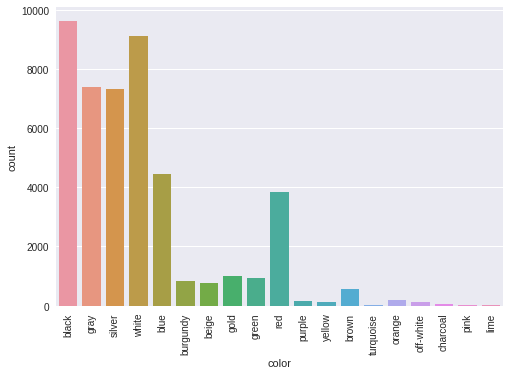

In [105]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)
plt.xticks(rotation=90)

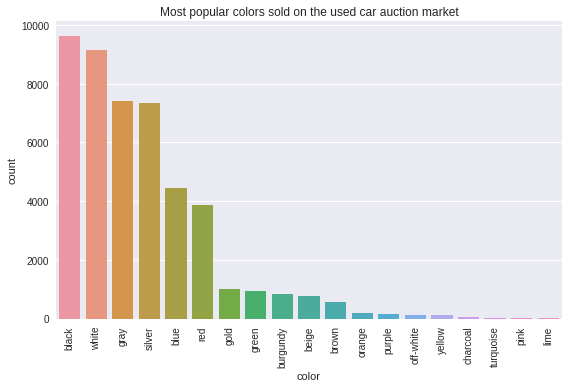

In [106]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

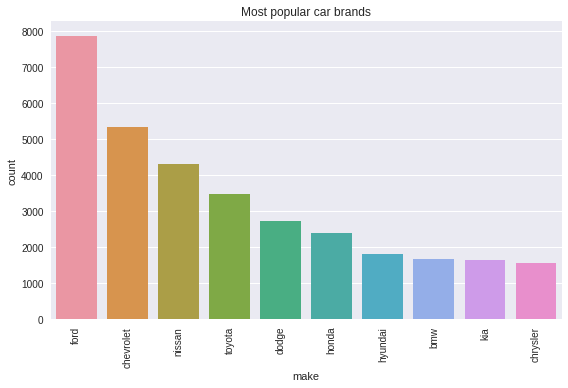

In [107]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('make').size().sort_values(ascending=False)
large_to_small
sns.countplot(x='make', data=df, order=pd.value_counts(df['make']).iloc[:10].index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford ,Chevrolet ,Nissan


> Indented block



**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [108]:
z=df.groupby('transmission').mean()
z

,year,condition,odometer,sellingprice
transmission,,,,
automatic,2010.268786,3.430144,66518.568354,13761.075476
manual,2008.423030,3.264182,75892.723030,11181.775758


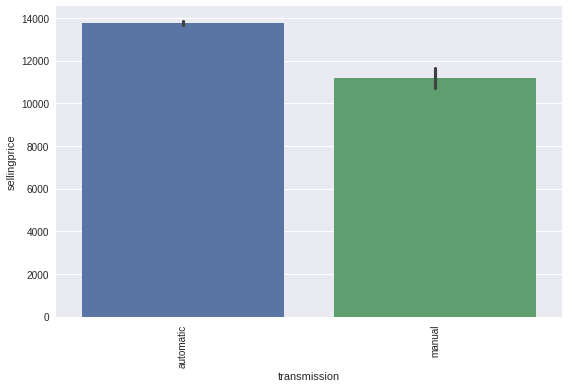

In [109]:
large_to_small = df.groupby('transmission').mean() 
large_to_small=large_to_small['sellingprice'].sort_values(ascending=False)
sns.barplot(x="transmission", y="sellingprice", data=df,order=large_to_small.index)
plt.xticks(rotation=90)
plt.tight_layout()

Q2**: Yes the automatic cars are higher in price

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

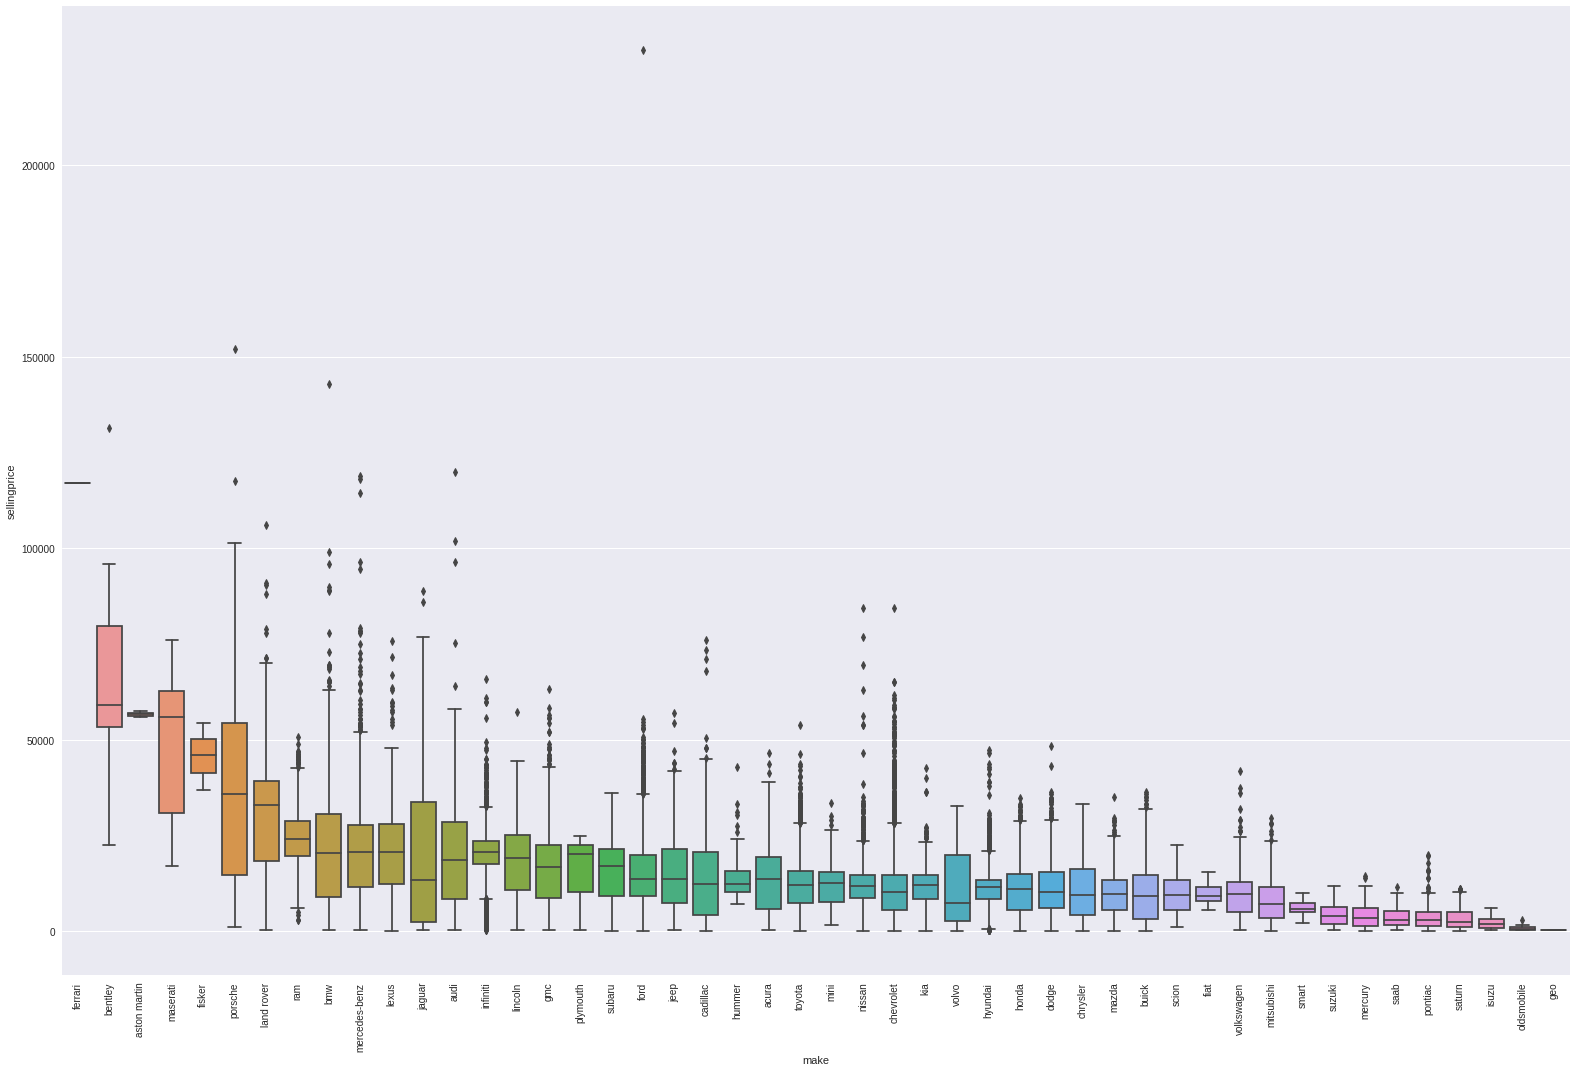

In [110]:
large_to_small = df.groupby('make').mean() 
large_to_small=large_to_small['sellingprice'].sort_values(ascending=False)
plt.figure(figsize=(22,15))
sns.boxplot(x="make",y='sellingprice', data=df,order=large_to_small.index)
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: porsche is the widest then jaguar. The most expensive are porsche then BMW

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

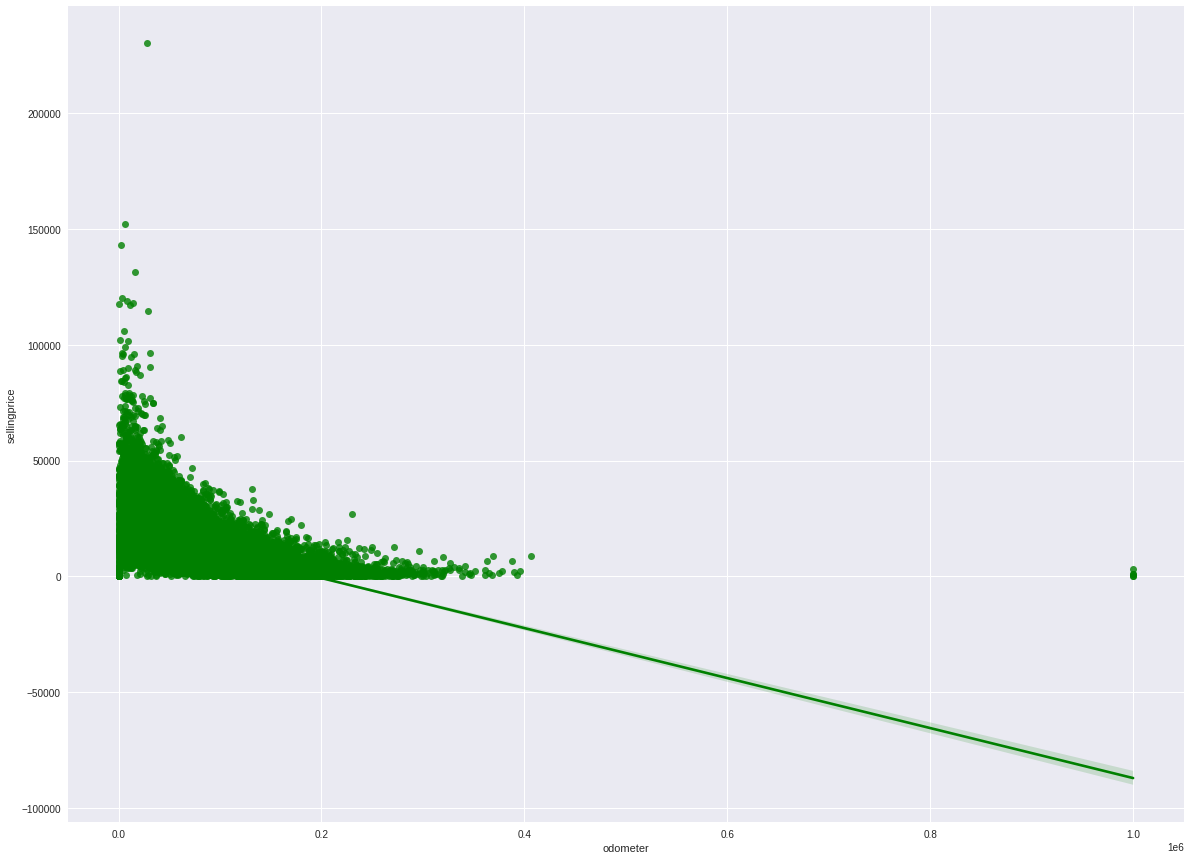

In [111]:
f = plt.figure(figsize=(20,15))
sns.regplot(x="odometer", y="sellingprice", data=df,color="g")

In [112]:
df.corr()

,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


**Answer for Q4**: They are negatively correlated  so when one increase  the other decrease and vice versa

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

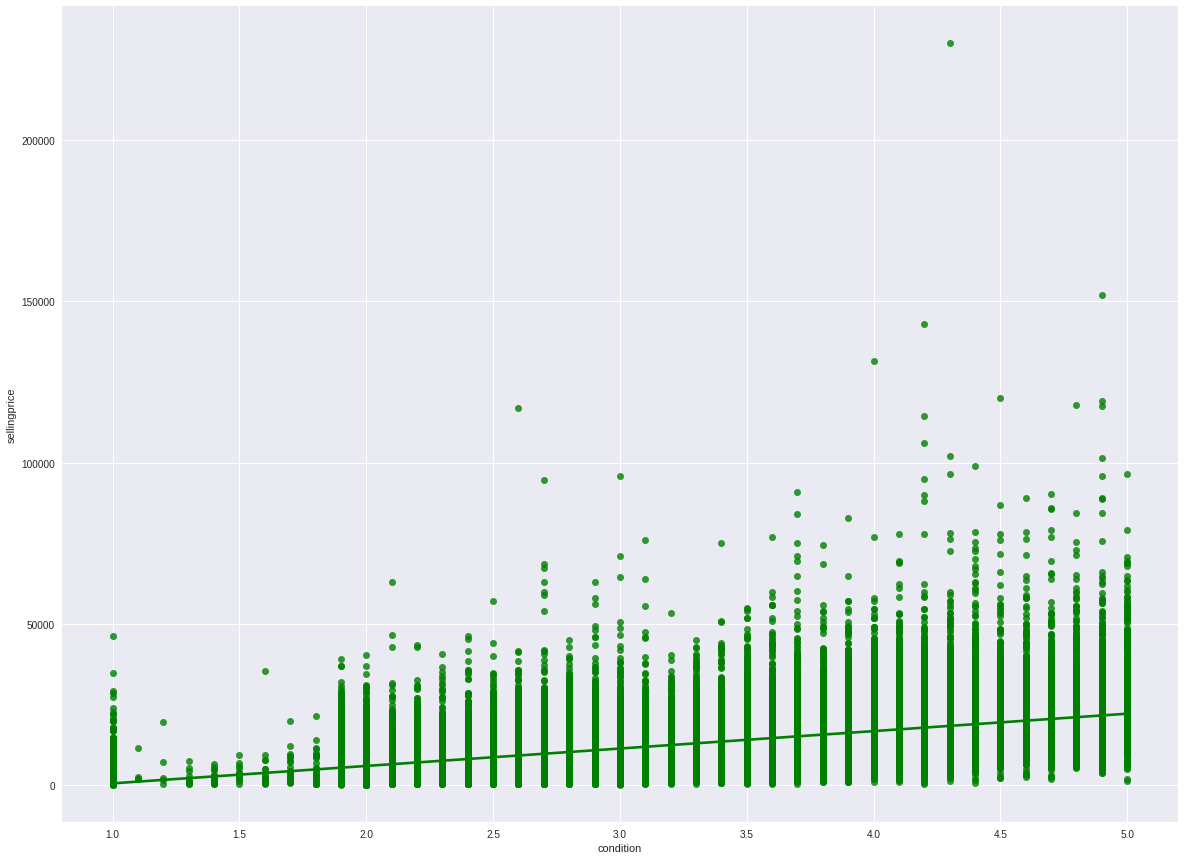

In [113]:
f = plt.figure(figsize=(20,15))
sns.regplot(x="condition", y="sellingprice", data=df,color="g")

**Answer for Q5**: They  are postively correlated so when one increase  the other increase and vice versa


**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

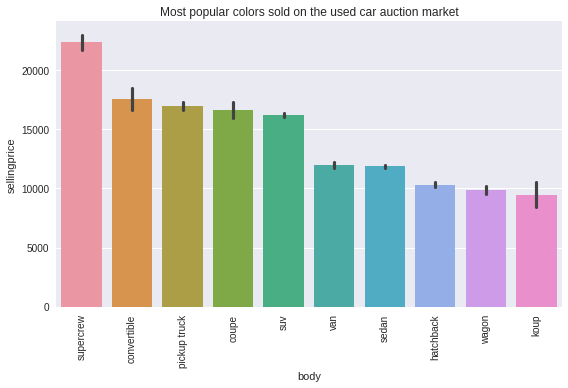

In [114]:
large_to_small = df.groupby('body').mean()
large_to_small=large_to_small['sellingprice']
large_to_small=large_to_small.sort_values(ascending=False)
sns.barplot(x='body',y='sellingprice' ,data=df,order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

In [115]:
large_to_small = df.groupby('body').mean()
large_to_small=large_to_small['sellingprice']
large_to_small.sort_values(ascending=False)

body
supercrew       22340.150000
convertible     17581.563278
pickup truck    16985.410565
coupe           16586.987042
suv             16221.941270
van             11981.053571
sedan           11861.795912
hatchback       10320.636123
wagon            9872.678720
koup             9429.166667
Name: sellingprice, dtype: float64

**Answer for Q6**: Koup is the lowest and supercrew is the highest

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

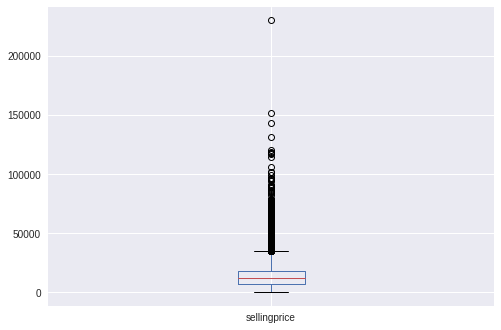

In [116]:
#removing selling price outliers
df.boxplot(column=['sellingprice'], return_type='axes')
for x in ['sellingprice']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
df = df.dropna(axis = 0)

In [117]:
categorical_columns = ['make', 'model', 'trim','body','state','color','interior','saledate','transmission']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'state' 'condition'
 'odometer' 'color' 'interior' 'seller' 'sellingprice' 'saledate']

Number of rows and columns in the dataset: (45189, 14)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' ... 'saledate_2015-07-09 13:30:00+07:00'
 'saledate_2015-07-09 17:15:00+07:00' 'transmission_manual']

Number of rows and columns in the dataset: (45189, 4006)


In [118]:

df_encode=df_encode.drop('seller',axis=1)

## Modelling

_Apply the linear regression model below._

In [119]:
df_encode.head()

,year,condition,odometer,sellingprice,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_fiat,make_ford,make_geo,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_isuzu,make_jaguar,make_jeep,make_kia,make_land rover,make_lexus,make_lincoln,make_maserati,make_mazda,make_mercedes-benz,make_mercury,make_mini,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_ram,make_saab,...,saledate_2015-07-01 09:30:00+07:00,saledate_2015-07-01 12:35:00+07:00,saledate_2015-07-02 06:00:00+07:00,saledate_2015-07-02 06:20:00+07:00,saledate_2015-07-02 06:30:00+07:00,saledate_2015-07-02 06:35:00+07:00,saledate_2015-07-02 07:00:00+07:00,saledate_2015-07-02 07:30:00+07:00,saledate_2015-07-02 08:00:00+07:00,saledate_2015-07-02 09:00:00+07:00,saledate_2015-07-02 09:30:00+07:00,saledate_2015-07-03 06:00:00+07:00,saledate_2015-07-03 09:00:00+07:00,saledate_2015-07-06 06:30:00+07:00,saledate_2015-07-07 06:00:00+07:00,saledate_2015-07-07 06:10:00+07:00,saledate_2015-07-07 06:15:00+07:00,saledate_2015-07-07 06:30:00+07:00,saledate_2015-07-07 07:00:00+07:00,saledate_2015-07-07 08:00:00+07:00,saledate_2015-07-07 09:30:00+07:00,saledate_2015-07-07 09:45:00+07:00,saledate_2015-07-07 10:00:00+07:00,saledate_2015-07-07 17:15:00+07:00,saledate_2015-07-08 06:20:00+07:00,saledate_2015-07-08 06:30:00+07:00,saledate_2015-07-08 07:20:00+07:00,saledate_2015-07-08 07:30:00+07:00,saledate_2015-07-08 08:30:00+07:00,saledate_2015-07-08 09:30:00+07:00,saledate_2015-07-08 10:30:00+07:00,saledate_2015-07-08 17:15:00+07:00,saledate_2015-07-09 06:30:00+07:00,saledate_2015-07-09 06:45:00+07:00,saledate_2015-07-09 07:00:00+07:00,saledate_2015-07-09 07:30:00+07:00,saledate_2015-07-09 09:00:00+07:00,saledate_2015-07-09 13:30:00+07:00,saledate_2015-07-09 17:15:00+07:00,transmission_manual
0,2013,3.9,50404.0,10900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable

y = df_encode['sellingprice'] # Dependent variable


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 36151
Testing dataset size: 9038


In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [122]:
# sklearn regression module
y_pred_sk = lin_reg.predict(x_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  7194660.452016889
R square obtain for scikit learn library is : 0.877812549778135


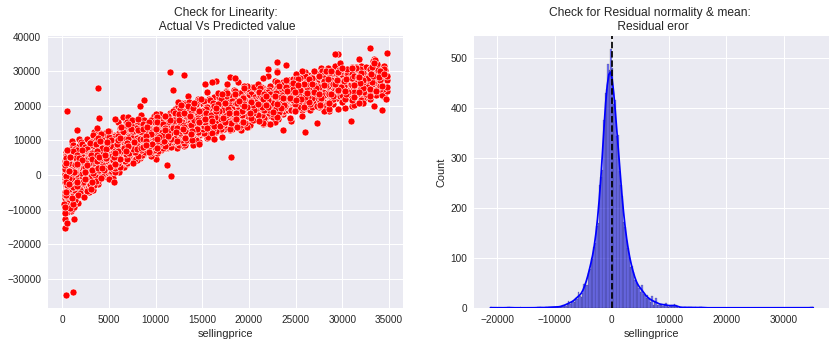

In [123]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred_sk), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

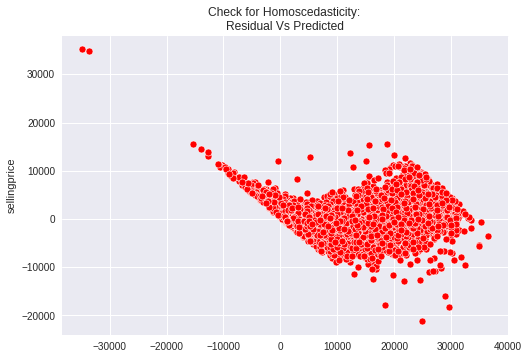

In [124]:
# Check for Multivariate Normality
# Quantile-Quantile plot
import scipy as sp
y_pred=y_pred_sk

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), color='r') 
plt.title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:The model accuracy is  decent R>0.87 which is  good and fairly accurate.For the MSE the value is decent as well given that we the price of cars is a high value so the number can be a bit large but still won't differ alot from the original value.We can check that from the residual error graph that it is close to be normaly distributed.Same for the linearity graph we can notice that the predicted values are close to the actual values except for soem valies.In order to improve accuracy we had to drop the seller column as it has so much values so any way of encoding won't do well.Also, reducing the number of attributes for body improved the numbers.removing the outlier enhanced the R by 0.02
Yes I would recommend this model to be used as it  has good R value and good mean square value.It is not the best but it is quite okay.